In [12]:
import numpy as np
import matplotlib.pyplot as plt
from lilv import World, Instance

In [13]:
def run_audio_plugin(uri, buffers=[], samplerate = 44100, input_index=0):
    world = World()
    world.load_all()
    plugin = world.get_all_plugins().get_by_uri(uri)
    instance = Instance(plugin, samplerate)
    for index, buffer in buffers.items():
        instance.connect_port(index, buffer)
    instance.activate()
    instance.run(buffers[input_index].size)
    instance.deactivate()

In [14]:
nsamples = 500
buffers = {
    0: np.sin(440 * 2 * np.pi * np.arange(nsamples) / nsamples),
    1: np.zeros(nsamples),
}

In [15]:
run_audio_plugin("https://github.com/jrialland/lv2plugins/autopitch", buffers)

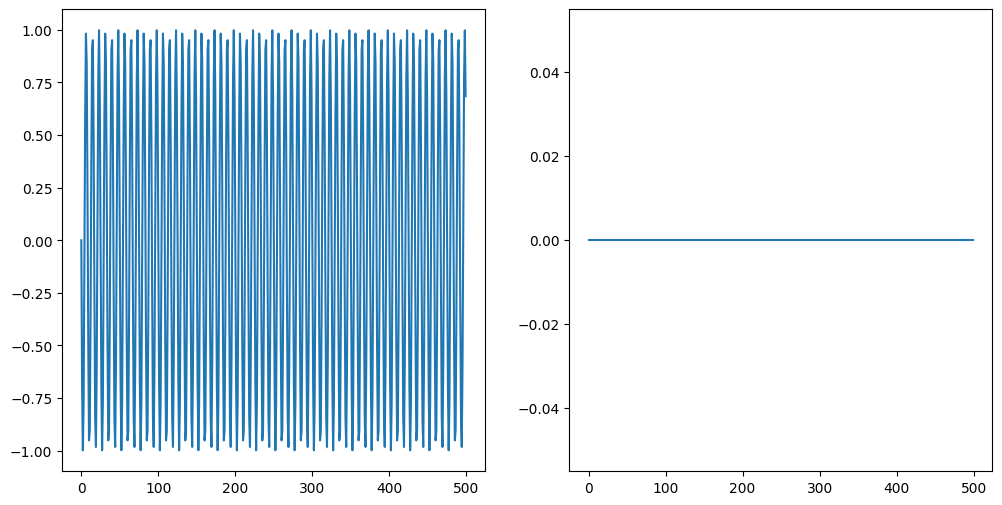

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].plot(buffers[0])
axes[1].plot(buffers[1])